# AIRCRAFT RISK ANALYSIS

## OVERVIEW

This project analyzes aviation accidents from the National Transportation Safety Board(NTSB), covering incidents from 1962 to 2023. The goal is to identify low risk aircrafts that the company can consider for purchase as it ventures into commercial and private entreprise by cleaning, sorting, grouping, aggregatting data, we extract insight for strategic decision making of aircraft acquisiotion

## BUSINESS PROBLEM

The company is entering the aviation industry. However, they lack insight into the historical safety performance of different aircraft. The goal of this analysis is to identify aircrafts with low accidents, considering the provided factors and give recommendations on the safest and suitable aircrafts

## DATA UNDERSTANDING

The dataset comes from National Transportation Safety Board(NTSB) and contains aviation accidents from 1962 to 2023. the dataset contain information on:

1. 'Event'.'Date': Date of the incident,accident 
2. 'Make', 'Model': manufacturer and aircraft model 
3. 'Injury Severity' : Fatal, Serious, minor injuries 
4. 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjered'
5. 'Purpose of flight': Purpose such as business, personal 
6. 'Weather condition' 
7. 'Broad phase of flight' : such as Takeoff, cruise, landing... 
8. 'Aircraft damage': extent of damage of the the aircraft 
9. 'Engine Type', 'Number of Engines'

The key measure variables used are:

'Total.Fatal.Injuries': accidents that caused death, 'Total.serious.Injuries' : accidents that caused servier injuries, 'Total.Minor.Injuries' : accidents that caused minor injuries, 'Total.Uninjered' : accidents that did not cause injuries.


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [85]:
df = pd.read_csv("./Data/AviationData.csv", encoding = "ISO-8859-1",low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [86]:
# checking the size of our dataset
df.shape

(88889, 31)

In [87]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# DATA PREPARATION

# Data cleaning

In [88]:
# Dropping empty and irrelevant columns
df.drop(columns=[
    'Event.Id','Accident.Number','Airport.Name','Airport.Code',
    'Latitude','Longitude','Registration.Number','FAR.Description',
    'Schedule','Air.carrier','Report.Status','Publication.Date',
    'Country'], inplace=True)

In [89]:
df.shape

(88889, 18)

Data cleaning aircraft Make and Model column

In [90]:
# Filling nan value with unknowm 
df.loc[:,"Model"]=df["Model"].fillna("Unknown").str.strip().str.upper()
df.loc[:,"Make"]=df["Make"].fillna("Unknown").str.strip().str.upper()

In [91]:
# Concatinate Make and Model column to form one column (Make_Model)
df["Make_Model"] = df["Make"].str.strip().str.upper()+ " " +df["Model"].str.strip().str.upper()
df

,Investigation.Type,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model
0,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,STINSON,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,STINSON 108-3
1,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,PIPER,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,PIPER PA24-180
2,Accident,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,CESSNA,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,CESSNA 172M
3,Accident,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,ROCKWELL,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,ROCKWELL 112
4,Accident,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,CESSNA,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,CESSNA 501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, MD",Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,PIPER PA-28-151
88885,Accident,2022-12-26,"Hampton, NH",NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,BELLANCA 7ECA
88886,Accident,2022-12-26,"Payson, AZ",Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,AMERICAN CHAMPION AIRCRAFT 8GCBC
88887,Accident,2022-12-26,"Morgan, UT",NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,CESSNA 210N


Data cleaning on (['Total Fatal Injuries'],['Total Serious Injuries'],['Total Minor Injuries'],['Total Uninjered']) columns

In [92]:
# Filling missing values in the (['Total Fatal Injuries'],['Total Serious Injuries'],['Total Minor Injuries'],['Total Uninjered']) columns with 0
df.loc[:,'Total.Fatal.Injuries']=df['Total.Fatal.Injuries'].fillna(0)
df.loc[:,'Total.Serious.Injuries']=df['Total.Serious.Injuries'].fillna(0)
df.loc[:,'Total.Minor.Injuries']=df['Total.Minor.Injuries'].fillna(0)
df.loc[:,'Total.Uninjured'] = df['Total.Uninjured'].fillna(0)

In [93]:
# Replacing Incident by Accident in the Investigation type column
df.loc[:,"Investigation.Type"]= df["Investigation.Type"].replace("Incident","Accident")

In [94]:
# Checking for duplicates
df.duplicated().sum()

35

In [95]:
# Droping duplicates
df=df.drop_duplicates()
df.duplicated().sum()

0

Data cleaning on "Number of Engines" column

In [96]:
# Checking for unique values
df["Number.of.Engines"].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.,  6.])

In [97]:
# Finding the mean of Number of Engines column
df["Number.of.Engines"].mean()

1.1465556817358107

In [98]:
df["Number.of.Engines"].median()

1.0

* Number of Engines column contain a numerical continous data, that have a positively skewed distribution. So ill use the median as the
measure of central tendancy instead of mean, because mean is sensitive to outliers.

In [99]:
# Filling NaN values in the Number of Engines column with the median instade of mean because Number
df.loc[:,"Number.of.Engines"]=df["Number.of.Engines"].fillna(df["Number.of.Engines"].median())
df["Number.of.Engines"].unique()

array([1., 2., 0., 3., 4., 8., 6.])

In [100]:
#Checking for nall values
df["Number.of.Engines"].isna().sum()

0

## Data analysis


Analyzing top 10 aircraft Make by accident counts

Text(0, 0.5, 'Aircraft Make')

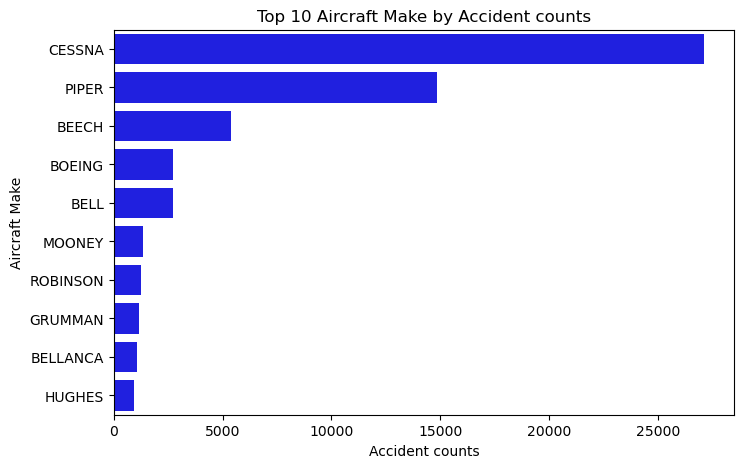

In [101]:
df.loc[:,"Make"]=df["Make"].fillna("Unknown").str.strip().str.upper()
Top_aircraft_Make =df["Make"].value_counts().head(10)

#Barplot on Make by Accident counts
bar_chart_title = "Top 10 Aircraft Make by accident counts"

plt.figure(figsize=(8,5))
sns.barplot(x=Top_aircraft_Make.values, y=Top_aircraft_Make.index, color = "blue")
plt.title("Top 10 Aircraft Make by Accident counts")
plt.xlabel("Accident counts")
plt.ylabel("Aircraft Make")


 Analyzing Top Aircraft Make and Model by accident counts

Text(0, 0.5, 'Aircraft Make + Model')

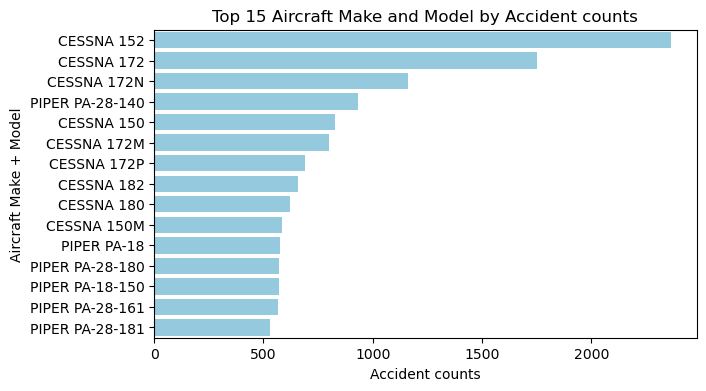

In [102]:
df.loc[:,"Make_Model"] = df["Make"].str.strip().str.upper()+ " " +df["Model"].str.strip().str.upper()
top_make_model = df["Make_Model"].value_counts().head(15)

#Bar plot of top 15 [Make_Model] by accident counts

plt.figure(figsize=(7,4))
sns.barplot(x=top_make_model.values, y=top_make_model.index,color="skyblue")
plt.title("Top 15 Aircraft Make and Model by Accident counts")
plt.xlabel("Accident counts")
plt.ylabel("Aircraft Make + Model")


 Analyzing the Top 15 aircraft Make and Model by Fatality

Text(0, 0.5, 'Aircraft Make_Model')

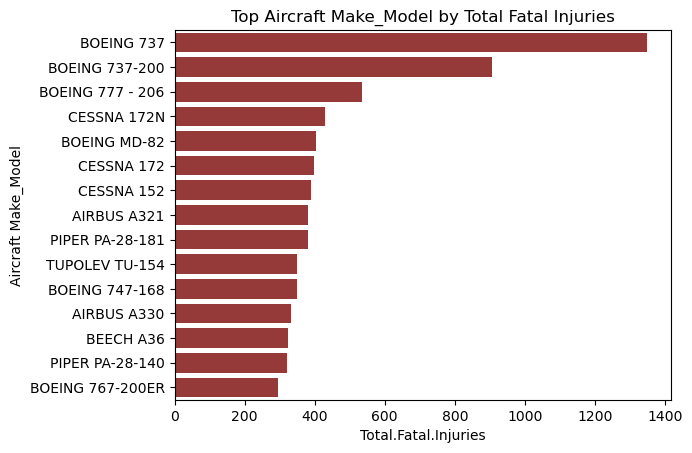

In [103]:
df.loc[:,"Make_Model"] = df["Make"].str.strip().str.upper()+ " " +df["Model"].str.strip().str.upper()

#Bar plot of the Top aircraft Make and model by Total Fatal Injuries
fatality_by_make_model = df.groupby("Make_Model")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).head(15)

sns.barplot(x=fatality_by_make_model.values,y=fatality_by_make_model.index, color ="brown")
plt.title("Top Aircraft Make_Model by Total Fatal Injuries")
plt.xlabel("Total.Fatal.Injuries")
plt.ylabel("Aircraft Make_Model")
#plt.savefig("AircraftbyFatality.png", bbox_inches="tight")

Analyzing Number of Engines by Accident counts


Text(0, 0.5, 'Accident count')

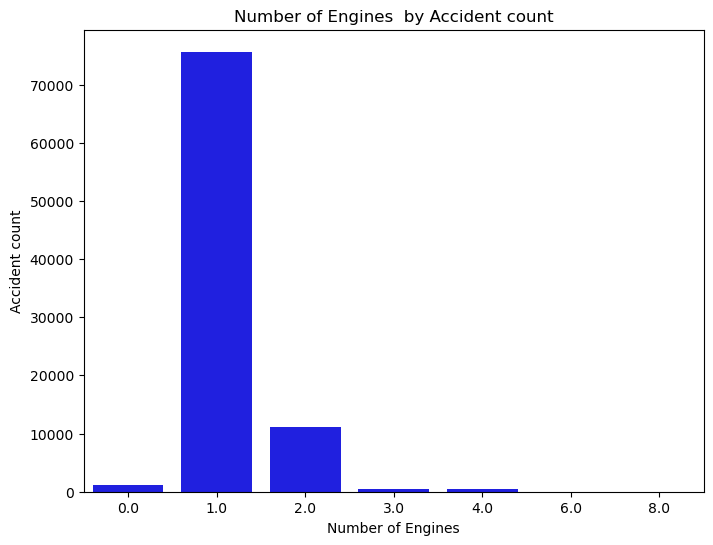

In [104]:
df.loc[:,"Number.of.Engines"]=df["Number.of.Engines"].fillna(df["Number.of.Engines"].median())

#Bar plot of Number of Engines by Accident counts
Engine_num=df["Number.of.Engines"].value_counts().head(13)

plt.figure(figsize=(8,6))
sns.barplot(y=Engine_num.values, x=Engine_num.index,color="blue")
plt.title("Number of Engines  by Accident count")
plt.xlabel("Number of Engines")
plt.ylabel("Accident count") 


 Data cleaning on Purpose of flight column

In [105]:
df["Purpose.of.flight"].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [106]:
# checking the total number of NaN values
df["Purpose.of.flight"].isna().sum()

6189

* Purpose of flight is a nominal-categorical variable so I use the modal value to fill in the missing values(NaNs)

In [107]:
#Finding the mode in Purpose of flight column
df["Purpose.of.flight"].mode()

0    Personal
Name: Purpose.of.flight, dtype: object

In [108]:
#Filling the NaNs with the mode
df.loc[:,"Purpose.of.flight"]=df["Purpose.of.flight"].fillna("Personal")
df["Purpose.of.flight"].isna().sum()

0

In [109]:
#Replacing the Unknown in the Purpose of flight column with the modal value
df.loc[:,"Purpose.of.flight"]=df["Purpose.of.flight"].str.replace("Unknown","Personal")

Data Analysis on purpose of flight column

Text(0, 0.5, 'purpose of flight')

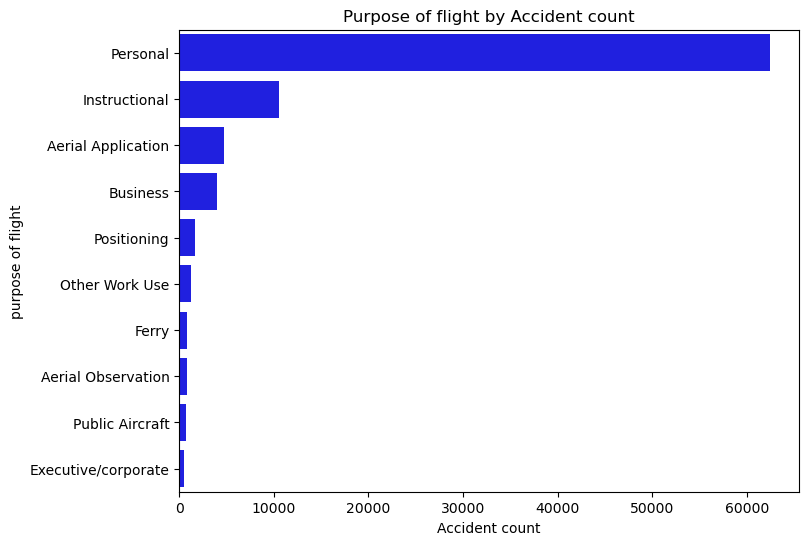

In [110]:


purpose_flight = df["Purpose.of.flight"].value_counts().head(10)
# Bar plot of Purpose of flight by Accident counts
plt.figure(figsize=(8,6))
sns.barplot(x=purpose_flight.values, y=purpose_flight.index,color="blue")
plt.title("Purpose of flight by Accident count")
plt.xlabel("Accident count")
plt.ylabel("purpose of flight") 



In [111]:
#df.to_csv("cleaned_data.csv",index=False)

# Results

1. From my first analysis of aircraft Make by the number of accident counts, I figured that Cessna have the highest number of accident counts followed by Piper. interms of aircraft Model Cessna 152 had the highest accident counts followed by Cessna 172 then 172N model. Considering Piper, model PA-28-140 have the leading accident counts.

2. Comparing the Fatality rate agaist Make and Model, I figured that Boeing 737 model have the highest fatality rate, followed by Boeing 737-200 model.

3. Personal flights displayed the highest accident counts.

4. Aircrafts with 1 number of engine displayed the highest accident counts.

# Conclusions

1. Comparing the Fatality rate by Make-Model, Boeing showed the highest fatality rate compared to other aircrafts. Boeing aircrafts are larger in size and are most commonly used for commercial services, they carry a lot more passengers compared to other aircrafts like Cessna, Piper, Beech. This increases its mortality rate with few accident counts.

2. Purpose of flight-personal flights are airplanes that are used for personal reasons. From the analysis, they displayed the highest accident counts compared to commercial aircrafts.

3.  Number of engine. aircrafts with 1 engine showed the highest accident counts compared to aircrafts with multi-engine. The company should invest in aircrafts with twin-engine in-case of one engine failure. The company shoudn't consider Aircrafts with 4,6,8 engines as they more complex to opperate and require specialist, the company can only invest in them only if it is necessary.

# Recommendations


1. For commercial airlines the company should take note of Boeing 737, 737-200 models high fatality rate and prefer other Boeing models, or invest in other commercial airlines like Airbus which displayed reduced fatality rate.
2. For personal airplanes the company should take note of Cessna highest accident counts especially Cessna 152 model and go with other personal models with reduced accident counts, models like Hughes, Grumman, Robinson, Mooney, Beech.
3. Purpose of Flight: The company can consider investing more on commercial aircrafts because they are generally safer than the personal airlines.
4.  The company should consider investing in aircrafts with twin engines for redundacy incase of one engine failure.
